In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day24-standardization/Social_Network_Ads.csv')

In [165]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [166]:
df = df.iloc[: , 2:]

In [167]:
df.sample(5)

Age  EstimatedSalary  Purchased
319   36            60000          0
253   37           146000          1
47    27            54000          0
53    35            23000          0
147   41            30000          0

# Train test Split

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased' , axis=1),
                                                   df['Purchased'] , test_size = 0.3,
                                                   random_state = 0)

X_train.shape , Y_train.shape

((280, 2), (280,))

# Standard Scaler

In [171]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [173]:
X_train

Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]

In [174]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [175]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns= X_test.columns)

In [176]:
np.round(X_train.describe() ,1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

# Here We can see in **standardization** mean 0 and standard deviation 1

In [178]:
np.round(X_train_scaled.describe(), 1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

## Effect of Scaling

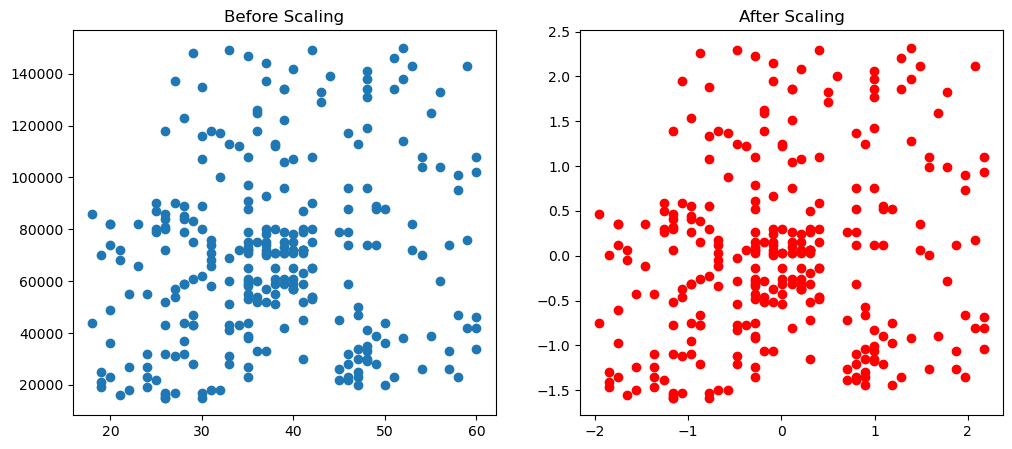

In [180]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.scatter(X_train['Age'] , X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'] , color='r')
ax2.set_title('After Scaling')
plt.show()

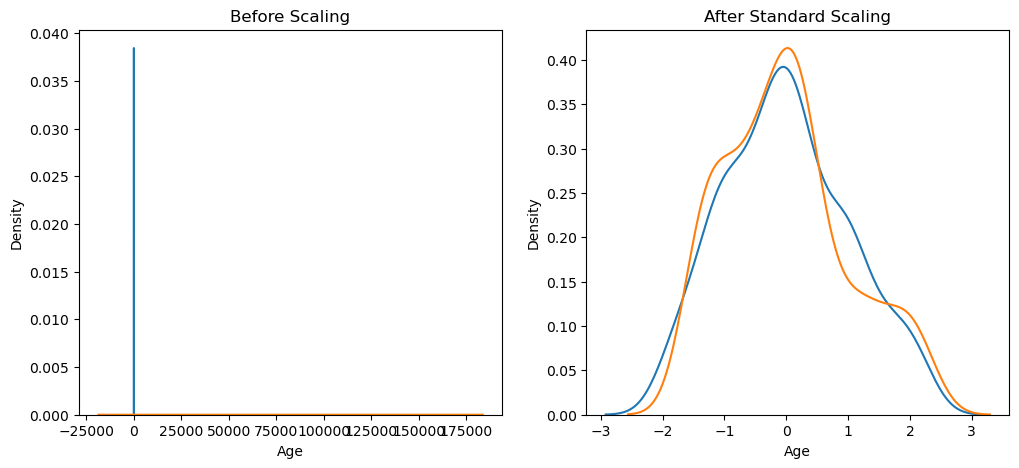

In [181]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

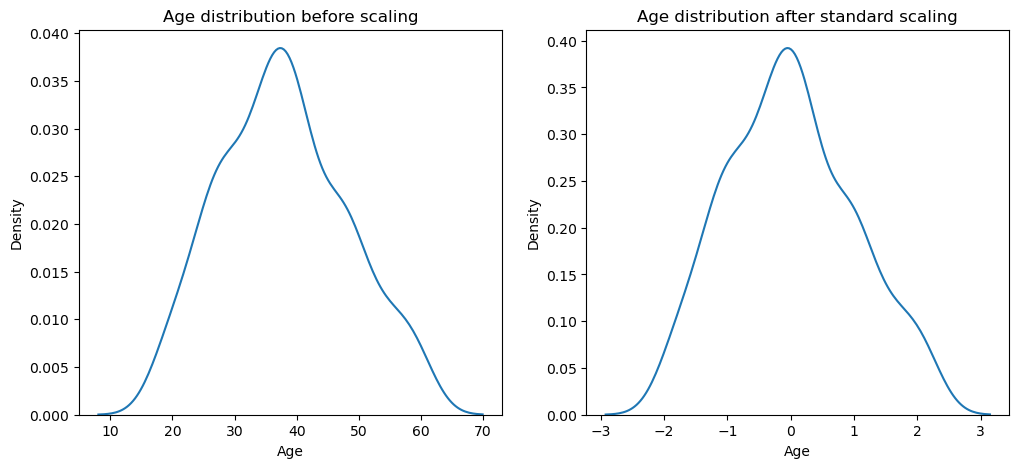

In [183]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Age distribution before scaling')
sns.kdeplot(X_train['Age'], ax = ax1)

ax2.set_title('Age distribution after standard scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
plt.show()

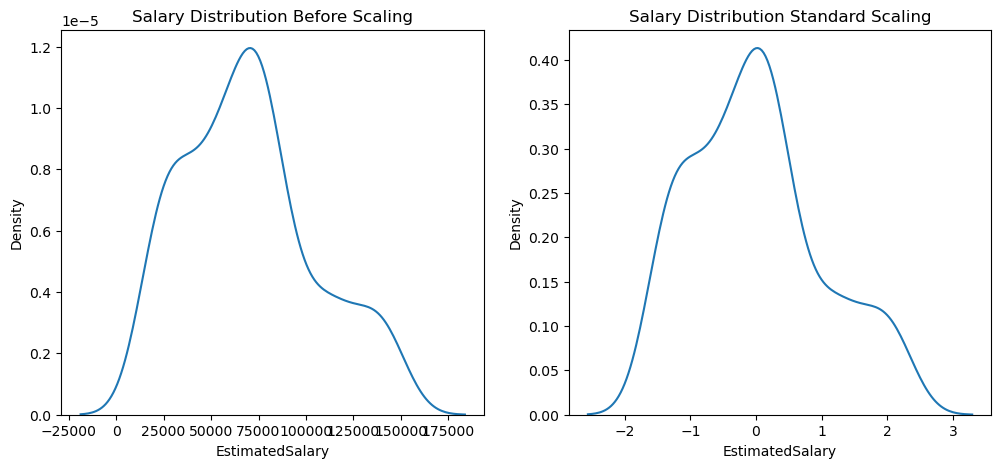

In [184]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important??

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [188]:
lr.fit(X_train, Y_train)
lr_scaled.fit(X_train_scaled, Y_train)

LogisticRegression()

In [189]:
Y_pred = lr.predict(X_test)
Y_pred_scaled = lr.predict(X_test_scaled)

In [190]:
from sklearn.metrics import accuracy_score

In [191]:
print('Actual Score', accuracy_score(Y_test, Y_pred))
print('Predicted Score', accuracy_score(Y_test, Y_pred_scaled))

Actual Score 0.875
Predicted Score 0.6583333333333333


In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [194]:
dt.fit(X_train, Y_train)
dt_scaled.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [195]:
Y_pred = dt.predict(X_test)
Y_pred_scaled= dt.predict(X_test_scaled)

In [196]:
print('Actual', accuracy_score(Y_test, Y_pred))
print('Predicted' ,accuracy_score(Y_test, Y_pred_scaled))

Actual 0.8666666666666667
Predicted 0.6583333333333333


In [197]:
df.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

# Effect of Outlier

In [199]:
new_data = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})

df= pd.concat([df, new_data] , ignore_index=True)

df

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
398   36            33000          0
399   49            36000          1
400    5             1000          0
401   90           250000          1
402   95           350000          1

[403 rows x 3 columns]

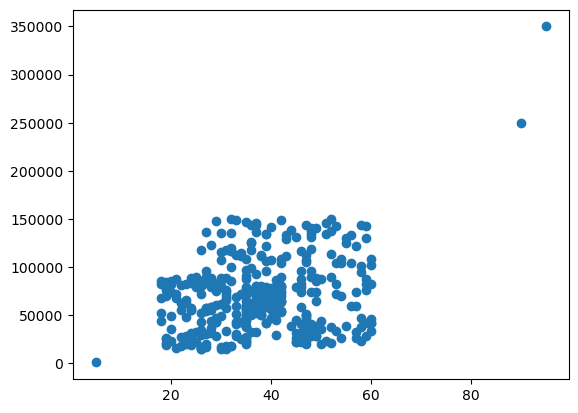

In [200]:
plt.scatter(df['Age'] , df['EstimatedSalary'])

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                   df['Purchased'],test_size=0.3,
                                                    random_state=0)

X_train.shape , X_test.shape

((282, 2), (121, 2))

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [203]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

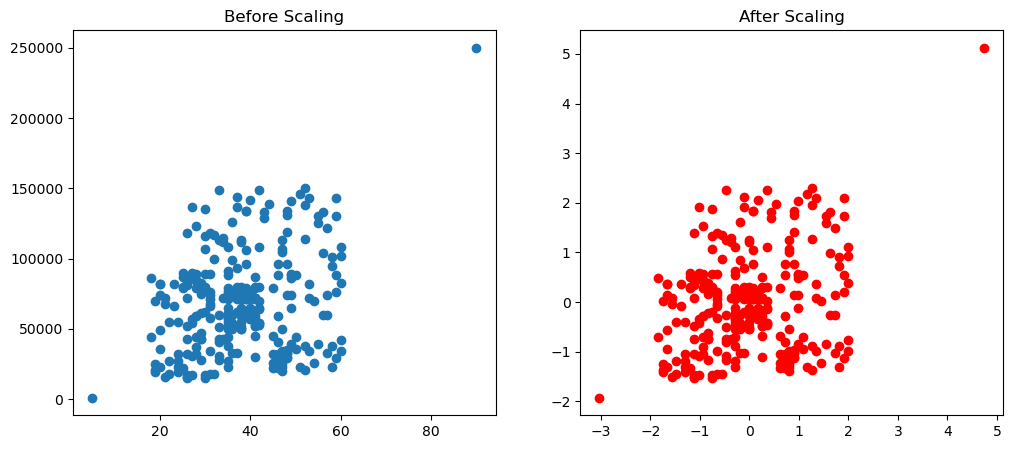

In [204]:
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize = (12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'] , color='r')
ax2.set_title('After Scaling')
plt.show()